In [2]:
#import libs
import seaborn as sns
planets = sns.load_dataset("planets")
planets.head() #veri gösterimi

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [3]:
#veriyi yedekliyoruz
df = planets.copy()

In [4]:
df.head() #verisetini kontrol amaçlı ilk 5 verisine göz attık.

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [5]:
#veri setinin yapısal bilgileri
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [6]:
#verilerin tiplerinie erişelim.
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [7]:
#dönüşüm işlemi yapalım.
#object tipini kategorik değişkene atayalım.
import pandas as pd
df.method = pd.Categorical(df.method)

In [8]:
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

In [9]:
#Genel olarak verilerin boyut değişkenine erişelim. 
#1035 değer ve 6 başlıktan oluşuyor.
df.shape

(1035, 6)

In [10]:
#Verilerin Değişkenlerine ulaşmak için alltaki kodu kullandık.
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [11]:
df.describe().T #T işlemi Transpose işlemidir ve aşağıdaki durumu yapar.
#bu fonkisyon eksik gözlemleri siler ve kategorik değişkenleri dışarıda bırakır.

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [12]:
#eksik değer anlalizi yapalım.
df.isnull().values.any()

True

In [13]:
#hangi değerlerde boş değerler olduğuna göz atalım.
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [14]:
#null değerleri silelim
df.dropna()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.30000,7.100,77.40,2006
1,Radial Velocity,1,874.77400,2.210,56.95,2008
2,Radial Velocity,1,763.00000,2.600,19.84,2011
3,Radial Velocity,1,326.03000,19.400,110.62,2007
4,Radial Velocity,1,516.22000,10.500,119.47,2009
...,...,...,...,...,...,...
640,Radial Velocity,1,111.70000,2.100,14.90,2009
641,Radial Velocity,1,5.05050,1.068,44.46,2013
642,Radial Velocity,1,311.28800,1.940,17.24,1999
649,Transit,1,2.70339,1.470,178.00,2013


In [15]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [16]:
#fillna ile bilrikte inplace argümanını aktif edip boş olan veri değerlerine 0 versini girdik.
df["orbital_period"].fillna(0, inplace = True)

In [17]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

In [18]:
#verilerin Null kısmına ortalama değer girmek için ise
df["mass"].fillna(df.mass.mean(),inplace = True)

In [19]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass                0
distance          227
year                0
dtype: int64

In [20]:
#Veri setimizdeki tüm değişkenlere 0 vermek istiyorsak;
df.fillna(df.mean(),inplace = True)

C:\Users\kayai\AppData\Local\Temp\ipykernel_18108\3556422335.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(),inplace = True)


In [21]:
df.isnull().values.any()

False

In [22]:
#yukarı kısımda veriler üzerinde birçok işlem yaptık ve başında verimizin bir kopyasını almıştık şimdi verimizi tekrardan çağırıyoruzç.
df = planets.copy()

In [23]:
df.isnull().values.any()

True

In [24]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [25]:
#verimiz eski haline geldi......

In [26]:
#Kategorik değişkenleri seçme işlemlerini yapalım.

kat_df = df.select_dtypes(include = ["object"])

In [27]:
kat_df.head() #çıktımızda da olduğu gibi veri setimizde 1 tane kategorik değişken vardı ve bu da çıktımızda görünüyor.

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


In [28]:
#bu kategorik değişkenlerin sınıflarına ve sınıf sayılarına erişmeye çalışalım..
kat_df.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [29]:
#yukarıda veri setimizdeki kategorilerin çıktısnı görüyoruz.
#kategorileri saydıralım
kat_df["method"].value_counts().count()


10

In [30]:
#bu veri setimizin 10 sınıfı var ve kategorik isimleri de yukarıdaki gibi..
#aşağıda frekanslara ulaşalaım 
#frekans = hangi kategoriden kaç tane var?

In [31]:
kat_df["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

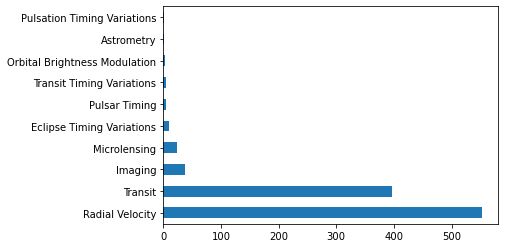

In [32]:
#veri setimizi bir sütun grafiğinde görselleştirelim.
df["method"].value_counts().plot.barh();

In [33]:
df_num = df.select_dtypes(include = ["float64","int64"])
#yukarıda sürekli değişkenlere erişmek istedik.

In [34]:
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [35]:
df_num.describe().T 

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [36]:
df_num["distance"].describe() 
#belirli değişkeni betimeleme

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

In [37]:
#verileri kişiselleştirme ve max, min, medyan, standart sapma, ortalama hesaplama.
print("Ortalama: "+str(df_num["distance"].mean()))
print("Dolu Veri Sayısı: "+str(df_num["distance"].count()))
print("Maksimum Değer: "+str(df_num["distance"].max()))
print("Minimum Değer: "+str(df_num["distance"].min()))
print("Medyan: "+str(df_num["distance"].median()))
print("Standart Sapma: "+str(df_num["distance"].std()))

Ortalama: 264.06928217821786
Dolu Veri Sayısı: 808
Maksimum Değer: 8500.0
Minimum Değer: 1.35
Medyan: 55.25
Standart Sapma: 733.1164929404422


In [39]:
#Farklı bir veri seti üzerinde çalışalım.
#               ...Diamonds...
#price : dolar cinsinde fiyat (326-18,823)
#carat : ağırlık (0.2-5.01)
#cut : kalite (Fair, Good, Very Good, Premium, İdeal)
#color : renk (from J(worst) to D(best))
#clarity : berraklığı, temizliği (I1(worst), SI2,SI1,VS2,VS1,VVS2,VVS1,IF(best))
# x : lenght in mm (0-10.74)
# y : width in mm (0-58.9)
# z : depth in mm (0-31.8)
# depth : toplam derinlik yüzdesi = z / mean(x,y) = 2 * z /(x+y)(43-79)
#table : elmasın en geniş noktasına göre genişliği (43-95)



In [41]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()
#verimizi görselliştirmek için seaborn kütüphanesini tanımladık.
#verimizi tanımlama sonrası bir kopyasını aldık bunu yapmamızın sebebi ana veri tabanını değiştirmemek.
#sonrasında head komutu ile tanımladığımız diamonds veri setini ekrana yazdırdık.


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [42]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [43]:
df.isnull()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
53935,False,False,False,False,False,False,False,False,False,False
53936,False,False,False,False,False,False,False,False,False,False
53937,False,False,False,False,False,False,False,False,False,False
53938,False,False,False,False,False,False,False,False,False,False


In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [49]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [50]:
kt_df = df.copy()

In [58]:
#value_counts() işlemi kategorinin frekansının çıktsını ekrana yazdırır.
#frekans = Bir kategori içinde verinin gözlenme sıklığı
kt_df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [59]:
kt_df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [60]:
kt_df["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [61]:
kt_df["depth"].value_counts()

62.0    2239
61.9    2163
61.8    2077
62.2    2039
62.1    2020
        ... 
71.3       1
44.0       1
53.0       1
53.1       1
54.7       1
Name: depth, Length: 184, dtype: int64

In [62]:
kt_df["table"].value_counts()

56.0    9881
57.0    9724
58.0    8369
59.0    6572
55.0    6268
        ... 
51.6       1
63.5       1
43.0       1
62.4       1
61.6       1
Name: table, Length: 127, dtype: int64

In [63]:
kt_df["price"].value_counts()

605      132
802      127
625      126
828      125
776      124
        ... 
8816       1
14704      1
14699      1
14698      1
9793       1
Name: price, Length: 11602, dtype: int64

In [64]:
#ordinal tanımlama
from pandas.api.types import CategoricalDtype

In [65]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [68]:
df.cut = df.cut.astype(CategoricalDtype(ordered = True))
#cut sütununudaki verilerin kategorisini sıralı olarak (ordered) değiştirme işlemini yapar.
#çıktımız görüldüğü gibi fair>good>very good>premium>ideal

In [69]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [74]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [75]:
#yukarıdaki sıralama veri seti hikayemizin sıralamasından farklı olduğu için,
#bu duruma el atıp bir sıralama listesi oluşturuyoruz.
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"] 

In [76]:
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler,ordered = True))
#oluşturduğumuz listeyi kategorik olarak tekrardan tanımladık.
#şimdi ekrana yazıp kontrol edelim

In [77]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

In [78]:
#işte şimdi veri sıralamamız, veri seti hikayemize uygun oldu.

In [79]:
#yukarıdaki yaptığımız veri seti işlemini sadece "cut" başlığı ile değil diğer kategoriler ile de yapalım.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [80]:
df.color.head()

0    E
1    E
2    E
3    I
4    J
Name: color, dtype: category
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [81]:
#burada renkleri ilk başta liste oluşturmadan CategoricalDtype metodu ile sıralayalım.
df.color = df.color.astype(CategoricalDtype(ordered = True))

In [82]:
df.color.head(1)

0    E
Name: color, dtype: category
Categories (7, object): ['D' < 'E' < 'F' < 'G' < 'H' < 'I' < 'J']

In [86]:
#veri seti hikayemizi incelediğimizde sıralamamız bu sıralama ile uyuşmuyor çünkü D en iyisi, J ise en kötüsü
#bu yüzden bir liste oluşturup listeyi CategoricalDtype metoduyla ordinal hale çevirelim.
color_kategoriler = ["J","I","H","G","F","E","D"]
df.color = df.color.astype(CategoricalDtype(categories = color_kategoriler,ordered = True))

In [87]:
df.color.head()

0    E
1    E
2    E
3    I
4    J
Name: color, dtype: category
Categories (7, object): ['J' < 'I' < 'H' < 'G' < 'F' < 'E' < 'D']

In [88]:
#verilerimizi listeleme yöntemi ile ordinal hale çevirip kontrol ettik ve veri seti hikayemizle uygun görünüyor.
#aynı işlemleri diğer kategoriler için yapalım.

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [92]:
df.clarity.head()

0    SI2
1    SI1
2    VS1
3    VS2
4    SI2
Name: clarity, dtype: category
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [93]:
#veriseti sıralaması IF en iyisi, I1 en kötüsü

In [94]:
df.clarity = df.clarity.astype(CategoricalDtype(ordered = True))

In [95]:
df.clarity.head(1)

0    SI2
Name: clarity, dtype: category
Categories (8, object): ['IF' < 'VVS1' < 'VVS2' < 'VS1' < 'VS2' < 'SI1' < 'SI2' < 'I1']

In [96]:
#sıralama yanlış ve bunu düzeltelim.

In [103]:
clarity_kategorisi = ["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"]
df.clarity = df.clarity.astype(CategoricalDtype(categories = clarity_kategorisi,ordered = True))

In [104]:
df.clarity.head()

0    SI2
1    SI1
2    VS1
3    VS2
4    SI2
Name: clarity, dtype: category
Categories (8, object): ['I1' < 'SI2' < 'SI1' < 'VS2' < 'VS1' < 'VVS2' < 'VVS1' < 'IF']

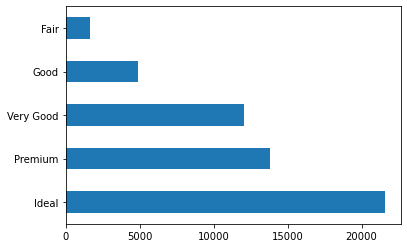

In [106]:
#Dağılım grafikleri hakkında
#BARPLOT
df["cut"].value_counts().plot.barh();
#bu kod parçacığında df olarak tanımladığımız veri setimizin içindeki "cut" başlığındaki verileri plot kütüphanesindeki bar metodu ile sütun grafiklerine dökmüş bulunduk.
#sonuna ";" koymamızın sebebi bilgi notunu siliyor.

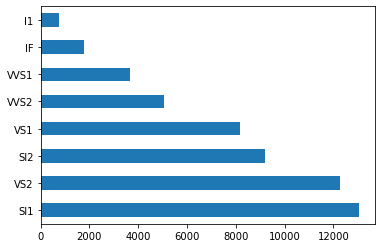

In [107]:
df["clarity"].value_counts().plot.barh();

In [110]:
#verilen grafiklere bir başlık eklemek istiyorsak;
#kod sonuna set_title("istenilen_baslik"); kısmını girmeliyiz.

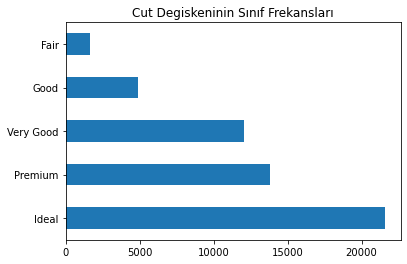

In [116]:
df["cut"].value_counts().plot.barh().set_title("Cut Degiskeninin Sınıf Frekansları");

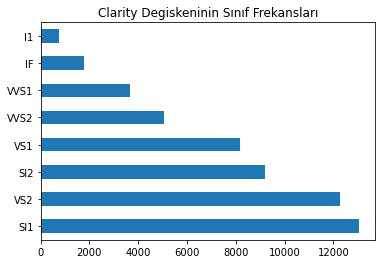

In [115]:
df["clarity"].value_counts().plot.barh().set_title("Clarity Degiskeninin Sınıf Frekansları");

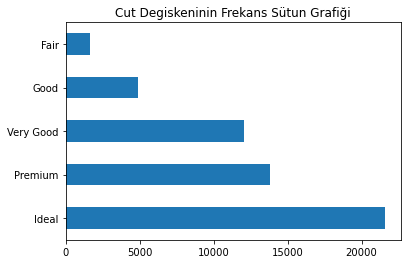

In [118]:
#Daha kolay veri görselleştirmek için şu şekil bir yazım tarzı tercih edilebilir.
(df["cut"]
 .value_counts()  #veri setine hangi metodu uygulayacağımız bu satırda
 .plot.barh()     #veri setine nasıl bir görselleştirme uygulayacağımız bu satırda
 .set_title("Cut Degiskeninin Frekans Sütun Grafiği")); #title atacağımız satır burada...



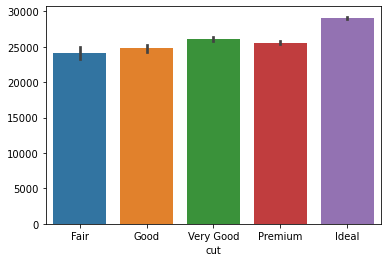

In [121]:
#seaborn kütüphanesi ile görselleştirelim.
sns.barplot(x = "cut",y = df.cut.index, data = df);

#burada sns ile import ettiğimiz seaborn kütüphanemizi kullandık ve
#bir çubuk sütun grafiği kullnacağımızı barplot ile belirttik
#sonrasında ise parantez açıp x eksenine hangi sütun başlığımızı koyacağımızı seçtik
#ve sonrasında y eksenine "cut" sütununun tek tek index değerlerini almasını söyledik.
# en sona ise bunu hangi veri setinde yapacağını tanımladık yani df'ye
# df bizim data frame oluyor bunu data değişkeninin içine attık.
# özet olarak 3 tane ana parametre kullandık
# BİRİNCİSİ X eksenine seçilecek sütun seçeneği
# İKİNCİSİ y eksenine seçilecek indeks değeri. Bu indeks değeri x eksenine göre seçilmeli.
# ÜÇÜNCÜSÜ ise birinci ve ikinci işlemin hangi data'da yapılacağını seçmek oldu.


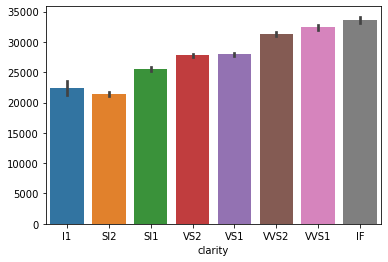

In [123]:
sns.barplot(x = "clarity",y = df.clarity.index, data = df);

In [124]:
#birden fazla kategorileri birlikte çaprazlayarak analiz edelim.
import seaborn as sns
from pandas.api.types import CategoricalDtype
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


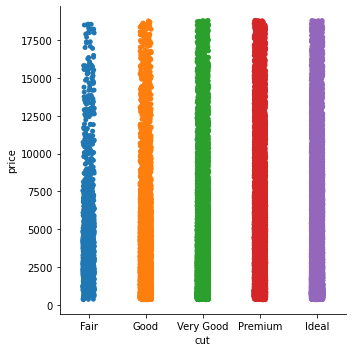

In [125]:
sns.catplot(x = "cut", y = "price", data = df);
#catplot metodu iki veri arasındaki çapraz görselleştirmeye yarar.

In [126]:
#----------------------Grafik Analizi---------------------
#yukarıdaki grafiğin anlatmaya çalıştığı Fair sınıfındaki bir elmasın fiyatlara göre yoğunluğudur.
#yukarıda da görüldüğü gibi Fair yani en kalitesiz elmasların yüksek fiyatlara doğru çıkıldıkça yoğunluğunun azaldığını gözlemlekteyiz.
#bu gözlem ise Kötü sınıfta olan bir elmasın fiyatı yüksek bir değerde satış oranı ideal sınıfta olan bir elmasa göre daha azdır.

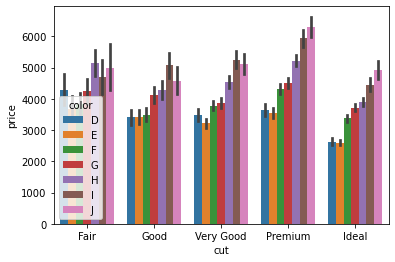

In [128]:
#hue argümanı bize 3 tane parametreyi bir grafikte göstermemizi sağladı 
# ilk iki argüman x ve y olurken üçüncü argümanımız ise color değişkeni oldu.
sns.barplot(x = "cut", y = "price", hue = "color", data = df);


In [129]:
#-----------------------------Grafik Analizi---------------------
#yukarıdaki grafik bize elmasların renklerinin ve olduğu sınıfın price,
#değişkeniyle aralarındaki bağı anlatmaya çalışıyor.
#mesela Premium sınıfındaki J renginde olan (yani en yüksek değere sahip olan elmas rengi) elmasın price değişkeninde nereye geldiğini göstererek,
#bize bir analiz fırsatı tanır.
#grafiklerin üstündeki küçük siyah çubuklar standart sapmayı (standart hata) belirler.
# İşin içine 3 farklı parametre girince olayımız büyük resime bakmaya döner ve
# price değişkeni ana resme bakmak için otomatik bir şekilde ortalaması alınıp grafiğe döküldü.


In [133]:
#-------------------------Grafik Doğrulaması----------------------
#bir veriyi grafiğe dökmek önemli değildir.
#verinin grafiğe dökülmüş halinin doğruluğu önemlidir.
#şimdi görselleştirilmiş verinin doğruluğunu test edelim.
df.groupby(["cut","color"])["price"].mean()

#burada bir groupby kullandık ve içine cut ve color sütunlarını kırdırdık.
#kırılan bu iki sütunu ise price sütunu ile çaprazlayıp 
#mean metodu ile medyanı (ortalam degeri) ölçüp ekrana yazdık.

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

In [134]:
#çıktılar ile görselleşmiş veriyi analiz edince verilerin doğruluğu göz kararı seçilebiliyor.
#bu sayede görselleştirdiğimiz verinin doğruluğunu test edip onayladık.
#                           ----ÖZETLE-----
# barplot veri görselleştirmeyi çağırıp üçüncü boyut olan hue argümanını kullanırsak,
# verimizin y ekseni ortalama değere dönüşüp bir toplulaştırma işlemi uyguluyor.
# bu toplulaştırma işlemini groupby ile test edip onaylayabiliriz.

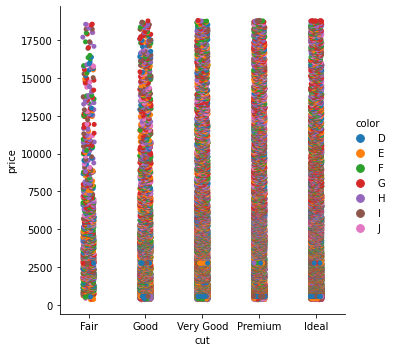

In [130]:
sns.catplot( x = "cut", y = "price", hue = "color",data = df);

In [131]:
#yine yukarıdaki grafikte cat metodu ile yoğunluk grafiği çizdirip yoğunlukları belirleyen renkleri de,
#hue argümanı ile tespit ettik.


In [135]:
# ------------------ HİSTOGRAM VE YOĞUNLUK GRAFİKLERİ-------------------

In [16]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


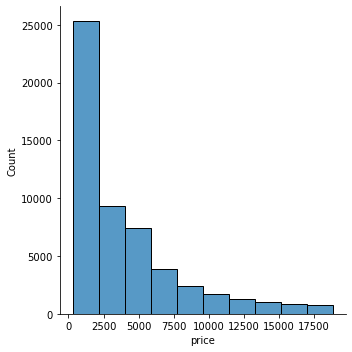

In [17]:
sns.displot(df.price, bins = 10, kde = False);
#yukarıdaki kodun amacı price değişkeninin frekansını ekrana yazdırır yani çıkarmak istediğimiz sonuç,
#fiyarı 0-2500 dolar olan mücehverlerin alım sayısının yoğunluğu ile ilgili bir analiz çıkartıyor.
#bins değişkeni görselleştirmek istediğimiz grafiğin kaç çubuktan oluşacağını belirler.
#bins = 10 ifadesi 10 çubukla görselleştirme anlamına gelir.
#kde argümanı ise yoğunluğun grafiğe eklenip eklenmeyeceğini belirler.
#aşağıdaki grafikte kde yani yoğunluk paramteresi dahil değildir.

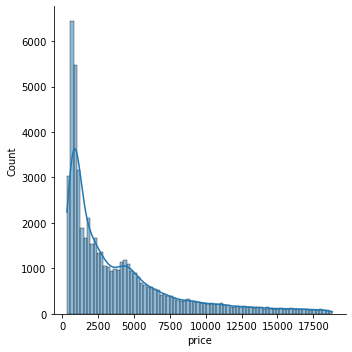

In [18]:
sns.displot(df.price,  kde = True);
#aşağıdaki görselleşmiş grafikte yoğunluk parametresi de devreye girip ince bir çizgi ile ifade edilmiştir.

In [26]:
df["price"].describe()
#%50 değeri medyandır.
#std standart sapma
#mean ortalama deger
#count toplam veri sayısı
#max ve min en yüksek ve en düşük değerler
#bu değerler ile görselleşmiş grafikler birlikte analiz edilince,
#görselleşmiş verinin doğruluğuna onay verebiliyoruz.

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [ ]:
#--------------------GRAFİK ANALİZİ------------------------
#Standart sapması çok düşük değil çünkü 0-2500 arasıyla diğer değerlerin yayvan olduğu görülüyor.
#Çarpık bir dağılımının olduğu da görülebiliyor
#Pozitif çarpıklık söz konusu çünkü sağ kuyruk daha uzun.
#eğer sol kuyruk daha uzun olsaydı negatif çarpıklık diyebilirdik.

In [19]:
#genel olarak argümanları görmek için;
#?sns.distplot
#yazarak erişebilirsiniz.


C:\Users\kayai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


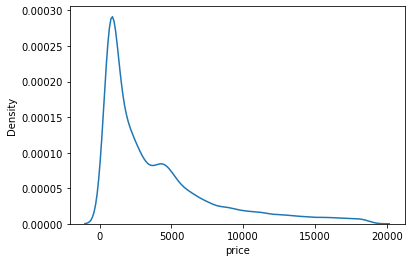

In [25]:
#----------------EĞER SADECE YOĞUNLUK GRAFİĞİNİ YAZDIRMAK İSTERSEK---------------------------
sns.distplot(df.price, hist = False);

In [ ]:
#HİSTOGRAM VE YOĞUNLUK GRAFİĞİ SAYISAL DEĞİŞKENLERİN KONUMLANDIRILMASINDA,
#DAĞILIMININ OLUŞTURULMASINDA KULLANILIR.
#GENEL OLARAK İKİSİ DE KULLANILABİLİR VEYA SADECE HİSTGORAMA DA BAKILABİLİR


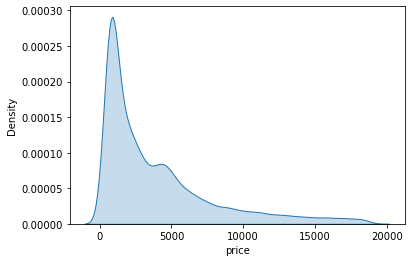

In [28]:
sns.kdeplot(df.price, shade = True);
#kdeplot fonksiyonunu kullanarak yoğunluk grafiği çizgisinin altını boyayarak,
#yoğunluk grafiğini görselleştirip ekrana yazdık.
#density = Yoğunluk

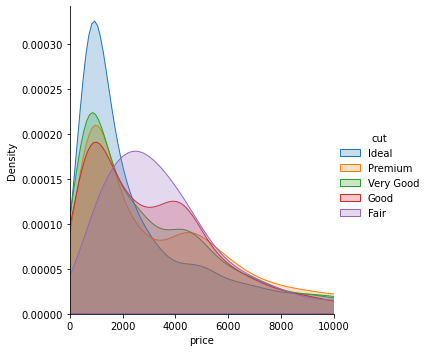

In [38]:
(sns
 .FacetGrid(df,
              hue = "cut",
              height = 5,
              xlim = (0,10000))
 .map(sns.kdeplot,"price",shade = True)
 .add_legend()
);

#yukaırdaki kodun amacı;
#facetgrid birden fazla boyutları görselleşmiş veride bölerek çıktısını verir.
#height argümanı görselleşmiş verinin boyunu ayarlamamıza yardımcı olur.
#xlim değişkeni price sınıfının aralığını ayarlamamıza yardımcı olur.
#map argümanı cut değişkeninin içindeki sınıfları boyut olarak göstermeye yardımcı olur.
#map argümanı sayesinde farklı boyutları grafikte görüp çaprazlamalar hakkında bilgi sahibi olabiliriz.
#add_legend() argümanı ilgili sınıftaki renklerin ne anlama geldiğini kenarda yazdırmamızı sağlar.
#shade = True argümanı çizilen yoğunlul grafiklerinin içinin boyanmasına ve görüntünün kolay seçilmesine yardımcı olur.


In [39]:
#---------------- YUKARIDAKİ GRAFİĞİN ANALİZİ -----------------------
#bu tarz grafikler genel bir veri setinin analizi için temel düzeyde uygundur çünkü,
#bu grafik bir değişkenin içindeki sınıfların yoğunluklarını görselleştirip genel bir çaprazlama konusunda,
#bilgi sahibi olmamızı sağlar.
#bu grafiğe bakınca şunları çıkartabiliriz;
#iki tepeli bir yapı olduğunu görüyoruz bunu şu şekilde yorumlayabiliriz,
# bir yapı, tepe oluşumunda birden değişken vardır.
# 2 üstteki grafiğe bakacak olursak ideal sınıfının veri seti hikyaesinde en lüks olduğunu kafamıza yazmıştık.
# ama çaprazlama yaptığımızda aslında düşük fiyatlarda ideal değişkekninin daha yoğun olduğu gözlemleniyor.
# ön kabulümüz ise ideal olan yani lüks sınıfının fiyat olarak yükseklerde daha yoğun olacağıydı.


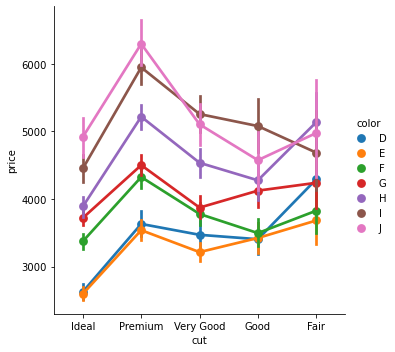

In [41]:
#Aşağıdaki kodda catplot argümanımızı klasik olarak kullandık,
#fakat hue argümanı ile 3.bir boyutu bastırdık,
#ekstra olarak kind argümanını da ekleyip grafiğin,
#nasıl bir tipte olacağını seçtik o tip ise "point" oldu,
#point türü verilerimizi cut sınıfının içindeki değişkenlerin üzerinde,
#büyük ve sade noktalayarak verimizi görselleştirmemize yardımcı olur.

sns.catplot(x = "cut", y = "price", hue = "color", kind = "point", data = df);

In [42]:
#-------------------------GRAFİK ANALİZİ--------------------
#BU GRAFİKTE fiyatın farklı seviyelerinde iki kategorik değişkenin etkilerini görüyoruz.
# x ekseni cut değişkenini ve sınıflarını, y ekseni price değişkenini,
#ve üstündeki renkler ve noktalar color değişkenini temsil etmektedir.
#analize geçtiğimizde ise çubukları görüp direkt standart sapmaların olduğunu görebiliyoruz.
#ideal sınıfının price değişkeni üzerindeki alana yoğunlaşırsak renklerin birbirleri arasındaki dağılım farklılıklarını görebiliyoruz.
# Önemli analizlerden birisi ise color aracılığyla cut değişkenleriyle kesiştiği noktada bir bilgi olabileceğinin habercisidir.
#yukarıda bahsettiğimiz kesişimdeki bilgi haberciliği ideal sınıfındaki turuncu ve mavi renk için çok geçerli değildir çünkü,,
#birbirlerine inanılmaz derecede yakınlardır buna eşit bile diyebiliriz.
# asıl gözlenmesi gereken ideal sınıfındaki pembe ile turuncudur birbirleri arasındaki uzaklıktan yola çıkabiliriz.
# bu yaptığımız manuel analizler aslında birer makine öğrenimidir.
# makine öğrenimi bilgi çıkarabileceği her yerden bilgi çıkarır ve buna göre bir karar destek mekanizması oluşturur.


In [43]:
#------------------ YENİ BİR VERİ SETİ VE HİKYAESİ----------------------
# total_bill : yemeğin fiyatı (bahşiş ve vergiler dahil)
#tip : bağış
#sex : ücreti ödeyen kişinin cinsiyedi (0 = male, 1 = female)
#smoker : grupta sigara içen var mı (0 =no,1=yes)
#day : gün (3=thur,4=fri,5=sat,6=sun)
#time : ne zaman? (0=day,1=night)
#size : grupta kaç kişi var ?

In [2]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [4]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [5]:
df["total_bill"].value_counts()

13.42    3
13.81    2
15.98    2
17.92    2
10.07    2
        ..
24.71    1
21.16    1
28.97    1
22.49    1
18.78    1
Name: total_bill, Length: 229, dtype: int64

In [6]:
df["tip"].value_counts()

2.00    33
3.00    23
4.00    12
5.00    10
2.50    10
        ..
4.34     1
1.56     1
5.20     1
2.60     1
1.75     1
Name: tip, Length: 123, dtype: int64

In [7]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [8]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [9]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [10]:
df["size"].value_counts()

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

In [11]:
#Elimizdeki veri seti ile Boxplot(kutu) grafiği

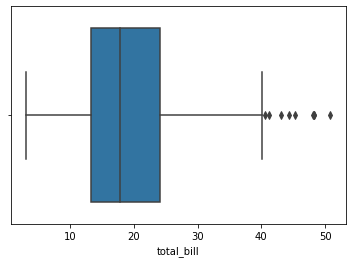

In [12]:
sns.boxplot(x = df["total_bill"]);

In [13]:
#boxplot bize çok değerli bilgiler sunar.
#en soldaki ince çizgi minimum değeri en sağdaki küçük nokta maximum değeri ifade eder.
# kutunun sol kenarı %25 inci değeri
# kutunun orta kısmından aşağı inen çizgi median değerini
# kutunun sağ kenarı ise %75. degeri ifade eder.
# bu yüzdelikd değerleri df.describe.T komutu ile kontrol edebiliriz.
# boxplot komutunun en yardımcı noktası aykırı değerleri tespit etmektir.
# aykırı gözlemleri boxplot görselleştirme tekniği ile tespit edebiliriz.
# sağda olan küçük siyah noktalar aykırı değerlerdir.

In [14]:
# ÇAPRAZLAMALAR
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [15]:
#Hangi günler daha fazla kazanıyoruz?

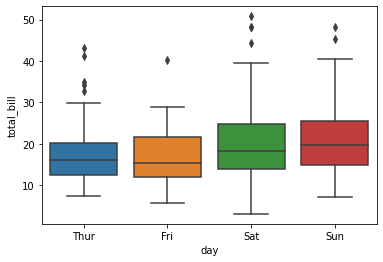

In [16]:
sns.boxplot(x = "day", y = "total_bill",data = df);

In [17]:
#yukarıdaki görselleştirdiğimiz veride günlere göre hangi günler ne kadar kazanmışız,
# ortalama değerlerini max ve min değerlerini günlerin totall bille göre aykırılıklarını görselleştirmiş bulunduk.
#analizimiz sonucu en fazla pazar günü kazanmışız. 



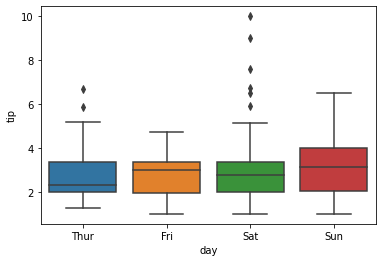

In [18]:
# Hangi gün en çok tip bırakılmış?
sns.boxplot(x = "day",y = "tip", data = df);

In [19]:
#görselleşen veriye göre en yüksek cumartesi günü bırakılmış.

In [20]:
#Hangi gün en fazla insan gelmiş?

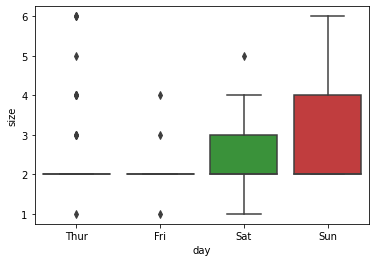

In [21]:
sns.boxplot(x = "day",y = "size", data = df);

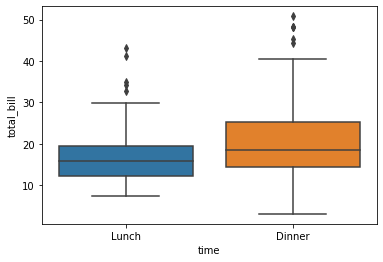

In [22]:
#sabah mı akşam mı daha fazla kazanıyoruz?
sns.boxplot(x = "time", y = "total_bill", data=df);

In [23]:
# görselleşmiş verinin analizi sonucu akşam yemeğinde daha fazla kazandığımız çıkarımını yapabiliyoruz.

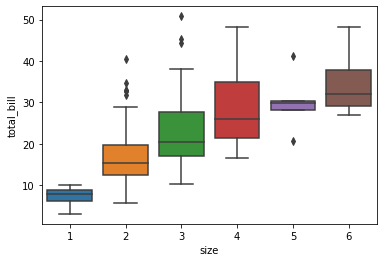

In [24]:
#kişi sayısına göre kazanç analizi
sns.boxplot(x = "size", y = "total_bill", data = df);

In [25]:
# yukarıdaki görselleşmiş verinin analizine göre kişi sayısı arttıkça kazanç da artmış


In [26]:
# günlere göre ve cinsiyete göre cebe giren paranın analizini yapalım.

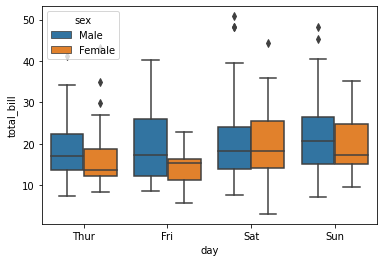

In [27]:
sns.boxplot(x = "day",y = "total_bill",hue = "sex", data =df);

In [28]:
#yukarıdaki grafikten yola çıkarak cumartesi hariç diğer günlerde kadının hesasbı ödediği veriler daha azdır.


In [29]:
#------------------------VİOLİN GRAFİKLERİ---------------------------
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


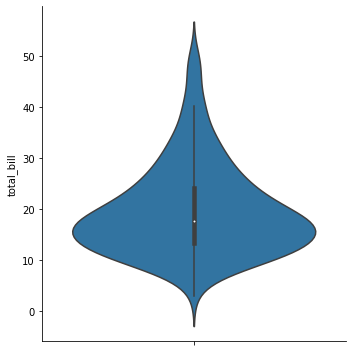

In [31]:
sns.catplot(y = "total_bill", kind = "violin",data = df);

In [32]:
#Bu grafik yoğunluk grafiğinin eksene çevrilmiş halidir.
#bu grafik bize merkezi eğilimi sunan aynı zamanda ortasında boxplot benzeri grafikleri bir bilgi sunar.
#tercihen kullanılan bir grafik türüdür.

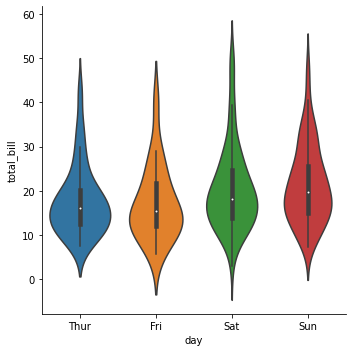

In [34]:
#-------------------------- VİOLİN ÇAPRAZLAMALARI ----------------------
#GÜNLER BOYUTUNU EKLEYELİM
sns.catplot(x = "day",y = "total_bill",kind = "violin",data = df);

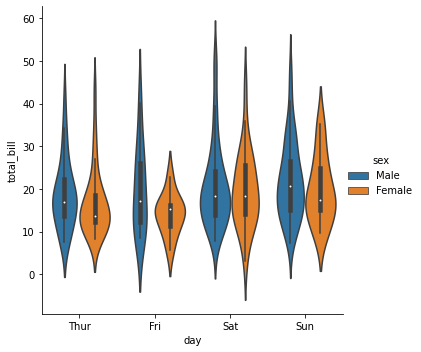

In [36]:
#bir boyut daha ekleyip çaprazlayalım..
#üçüncü bir boyutu ele almanın argümanı hue argümanıdır.

sns.catplot(x = "day",y = "total_bill", hue = "sex",kind = "violin",data = df);

In [40]:
#--------------------------KORELASYON GRAFİĞİNİN OLUŞTURULMASI---------
#Korelasyon değişkenler arasındaki ilişkiyi ifade eden istatistiksel grafiktir.
#SCATTERPLOT = saçılım grafiği demektir.
#bize sayısal değişkenler arasındaki ilişkiyi gösterir.
#iki değişkeni aynı anda değerlendirildikten sonra bize fikir verir.
# ŞU ANA KADAR YAPTIĞIMIZ VERİ İNCELEMELERİNİN DEĞİŞİMLERİ TEK DEĞİŞKENLİ VE ÇAPRAZLAMA,
# BOYUT YAPILAN EKLEMELERDİ AŞAĞIDAKİ BÖLÜMDE İKİ SAYISAL DEĞİŞKENİN BİRLİKTE
# OLUŞTURDUĞU YAPILARI DEĞERLENDİRECEĞİZ.

#----------------------------İKİ FARKLI DEĞİŞKENLİ VERİLERİN İNCELENMESİ-----
# AYNI ANDA İKİ SAYISAL DEĞİŞKENİN ORTAYA ÇIKARDIĞI YAPIYI İNCELEYECEĞİZ.
# YİNE 3. 4. DEĞİŞKENLERİ EKLEYEREK ARKA TARAFTA OLUŞAN BİLGİYE ULAŞACAĞIZ.

import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


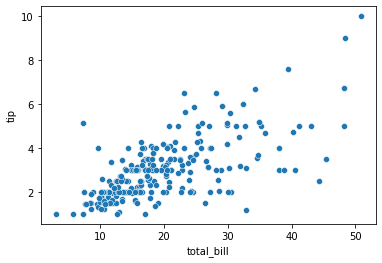

In [41]:
sns.scatterplot(x = "total_bill",y = "tip", data = df);

In [42]:
#Bu saçılım grafiğinden şöyle bir çıkarım yapabiliriz ;
#Ödenen miktar arttıkça bırakılan bahşiş sayısı da artmış.


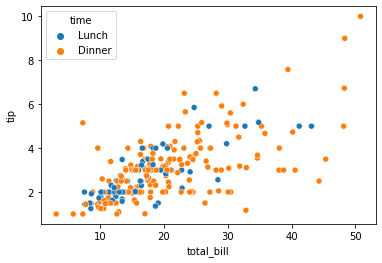

In [46]:
#-----------------------Korelasyonda Çaprazlamalar------------------4
sns.scatterplot(x = "total_bill", y ="tip", hue = "time", data = df);

In [48]:
#Yukarıdaki korelasyon grafiğine time kategorisini de getirerek;
#Akşam yemeğinde daha çok bahşiş bırakıldığı çıkarımı yapılabilir.4


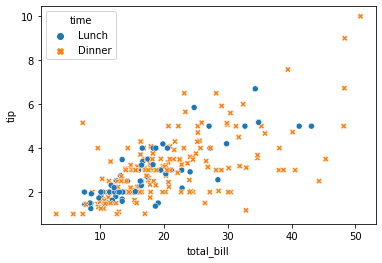

In [49]:
#Grafiksel analizleri gözle görünümünü kolaylaştırmak için style argümanını kullanabiliriz ve diğerlerinden farklı göstermek istediğimiz değişkeni,
# stye = "time" gibi yazarak o değişkenin sembolünü değiştirmesini scatterplot fonksiyonundan isteyebiliriz.

sns.scatterplot(x = "total_bill",y = "tip", hue = "time", style = "time",data =df);

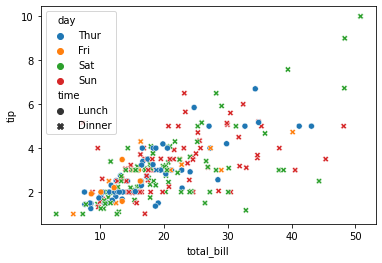

In [52]:
#Aşağıda style argümanınına değişkenlerden farklı bir şey yazdığımız için,
#ekrana çıkardığı grafikte style argümanı içinde olan time değişkenini kullnarak,
# toplam harcama ile bahşiş verilerini günler değişkeniniyle bölerek çıktı verdi.
#günler kırılımın da gördük.
# hem day değişkenini hem de time değişkenini bir arada gördük.

sns.scatterplot(x = "total_bill", y = "tip",hue = "day", style = "time", data = df);

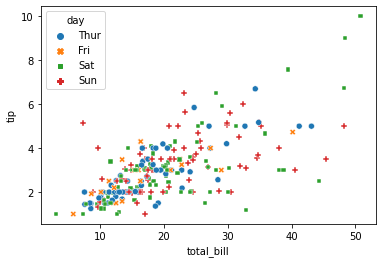

In [54]:
#time yerine day yazıp gözlemleyelim.
# burada ise sadece tek boyut yani günlere göre verilmiş oldu.

sns.scatterplot(x = "total_bill", y = "tip", hue = "day", style = "day",data = df);

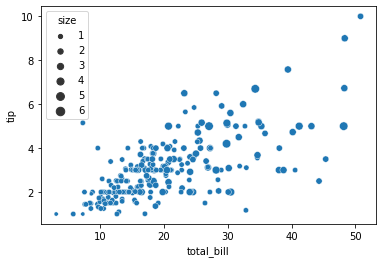

In [55]:
#PEKİ BİR SÜREKLİ DEĞİŞKENİ İŞİN İÇİNE KATARSAK NE OLUR?
sns.scatterplot(x = "total_bill", y = "tip", size = "size",data = df);

#size masalarda oturan yemek yiyen grubun içinde kaç kişi olduğunu söylerdi.
#yani bir sayısal değişkendi.
# sayısal bir sürekli değişkeni size argümanı ile ekledik.

In [56]:
#yukarıdaki grafikte boyutlar ekrana yazdırıldı küçükten büyüğe olarak grup sayıları ve,
# şekil büyüklükleri gördüğünüz üzere artıyor.

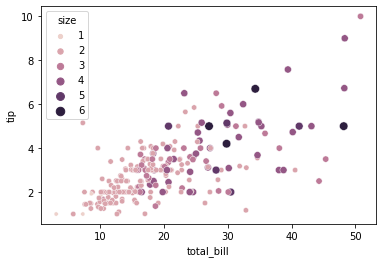

In [57]:
#EĞER HUE ARGÜMANINI KULLANARAK RENKLENDİRME YAPARSAK ;
sns.scatterplot(x = "total_bill", y= "tip", hue = "size", size = "size", data =df);
#DAHA ANLAŞILABİLİR BİR GRAFİK ÇIKTISI OLUYOR.